In [1]:
from premise_selection.count_context_premises import count_premises, count_chars
import matplotlib.pyplot as plt

/home/kthompson/coq-modeling/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-01-31 16:00:49,592] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/kthompson/coq-modeling/venv/lib/python3.10/site-packages/torchmetrics/utilities/imports.py:24: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _PYTHON_LOWER_3_8 = LooseVersion(_PYTHON_VERSION) < LooseVersion("3.8")


In [2]:
data_loc = "/home/kthompson/coq-modeling/data/premise-rnd-split-rnd-samp-pct-8"

# Counting Premises

In [36]:
premise_count_gen = count_premises(data_loc)
premise_counts: list[int] = []
for num in premise_count_gen:
    premise_counts.append(num)

Processed 2803

KeyboardInterrupt: 

In [39]:
freqs: dict[int, int] = {}
for count in premise_counts: 
    if count not in freqs:
        freqs[count] = 0
    freqs[count] += 1

In [40]:
plot_num = 25
counts: list[int] = []
freq_list: list[int] = []
for i in range(plot_num + 1):
    freq = freqs[i] if i in freqs else 0
    counts.append(i)
    freq_list.append(freq)


Text(0, 0.5, 'Frequency')

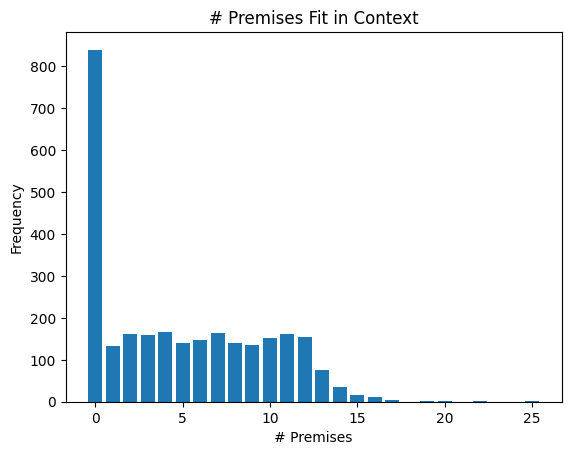

In [41]:
fig, ax = plt.subplots()
ax.bar(counts, freq_list)
ax.set_title("# Premises Fit in Context")
ax.set_xlabel("# Premises")
ax.set_ylabel("Frequency")

# Counting Chars

In [16]:
goal_char_counts: list[int] = []
proof_char_counts: list[int] = []
premise_char_counts: list[int] = []
char_counter = count_chars(data_loc)
for count_dict in char_counter:
    goal_char_counts.append(count_dict["goal"])
    proof_char_counts.append(count_dict["proof"])
    premise_char_counts.append(count_dict["premises"])



Processed 17945

KeyboardInterrupt: 

Text(0.5, 1.0, 'Number of chars per context type over 17945 examples.')

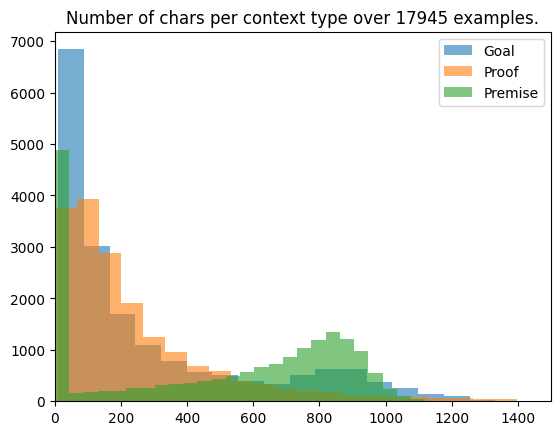

In [20]:
fig, ax = plt.subplots()
ax.hist(goal_char_counts, bins=30, alpha=0.6, label="Goal")
ax.hist(proof_char_counts, bins=30, alpha=0.6, label="Proof")
ax.hist(premise_char_counts, bins=30, alpha=0.6, label="Premise")
ax.set_xlim(0, 1500)
ax.legend()
ax.set_title(f"Number of chars per context type over {len(goal_char_counts)} examples.")

In [21]:
len([g for g in goal_char_counts if g == 0])

0

In [22]:
len([p for p in premise_char_counts if p == 0])

4724

In [23]:
len([p for p in proof_char_counts if p == 0])

2164